## wine Dataset Classification using DBSCAN with Dimension Reduction

DBSCAN을 이용하여 PCA가 적용된 wine 데이터셋 분류

<span style="color: #2D3748; background-color:#fff5b1;">PCA를 적용하여 feature의 수를 2개와 3개로 구성한 후 DBSCAN을 이용하여 실험한 결과 정확도 측면에서는 PCA를 적용하지 않은 방법과 비슷하지만 분류 시간의 경우 PCA를 적용하지 않은 경우 시간이 증가하였다.</span>

In [288]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification

In [289]:
scaler = MinMaxScaler()

comparison_acc = []
comparison_time = []

## DBSCAN with PCA feature 3

In [290]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

pca = PCA(n_components=3)
features = pca.fit(features).transform(features)
features = scaler.fit_transform(features)
target = target

print(features.shape)

(15000, 3)


In [291]:
epsilon = 0.2
point = 10

db = DBSCAN(eps=epsilon, min_samples=point, n_jobs=-1)

start = time.perf_counter()
db.fit(features, target)
end = time.perf_counter() - start

acc = metrics.accuracy_score(target, db.labels_)

print("Test set score: %f" % acc)
print("Training Time : %.4f" % end, "sec")

comparison_acc.append(acc)
comparison_time.append(end)

Test set score: 0.334133
Training Time : 0.6965 sec


## DBSCAN with PCA feature 2

In [292]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

pca = PCA(n_components=2)
features = pca.fit(features).transform(features)
features = scaler.fit_transform(features)
target = target

print(features.shape)

(15000, 2)


In [293]:
epsilon = 0.2
point = 10

db = DBSCAN(eps=epsilon, min_samples=point, n_jobs=-1)

start = time.perf_counter()
db.fit(features, target)
end = time.perf_counter() - start

acc = metrics.accuracy_score(target, db.labels_)

print("Test set score: %f" % acc)
print("Training Time : %.4f" % end, "sec")

comparison_acc.append(acc)
comparison_time.append(end)

Test set score: 0.334133
Training Time : 0.7961 sec


## DBSCAN

In [294]:
features, target = make_classification(n_samples=15000, n_features=4, n_informative=4, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)
features = scaler.fit_transform(features)

In [295]:
epsilon = 0.2
point = 10

db = DBSCAN(eps=epsilon, min_samples=point, n_jobs=-1)

start = time.perf_counter()
db.fit(features, target)
end = time.perf_counter() - start

acc = metrics.accuracy_score(target, db.labels_)

print("Test set score: %f" % acc)
print("Training Time : %.4f" % end, "sec")

comparison_acc.append(acc)
comparison_time.append(end)

Test set score: 0.334133
Training Time : 1.0822 sec


### Method Comparison

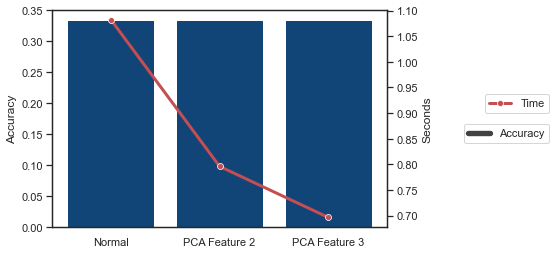

In [296]:
import seaborn as sns

sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(x=["PCA Feature 2", "PCA Feature 3", "Normal"],
            y=[comparison_acc[1], comparison_acc[0], comparison_acc[2]], 
            color='#004488',
            ax=ax1)

sns.lineplot(x=["PCA Feature 2", "PCA Feature 3", "Normal"], 
             y=[comparison_time[1], comparison_time[0], comparison_time[2]],
             color='r',
             marker="o",
             ax=ax2)

ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Seconds")

ax1.legend(["Accuracy"], loc=1, bbox_to_anchor=(1.5, 0.5))
ax2.legend(["Time"], loc=4, bbox_to_anchor=(1.5, 0.5))

plt.show()
sns.set()